In [1]:
from utils.rnn import ControlRNN
import torch.nn as nn
import torch

rnn_model = ControlRNN(input_size=4, hidden_size=300, num_layers=1, dropout_rate=0)
criterion = nn.MSELoss()

rnn_model.load_state_dict(torch.load("models/nn_model.pt"))

<All keys matched successfully>

In [2]:
from utils.robot import Robot

robot = Robot("COM9")

Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10
Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10


In [7]:
robot.close()

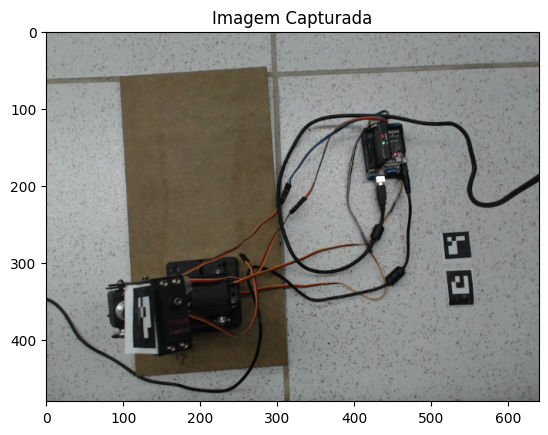

(None, None, None, None, None)

In [3]:
from utils.camera import Camera

camera = Camera(0.48, 0)

camera.get_aruco_positions(plot_image=True)

In [69]:
camera.release()

In [67]:
camera.show_arucos()

In [4]:
def dist_pos(curr, tgt):
    return ((curr[0]-tgt[0])**2 + (curr[1]-tgt[1])**2)**0.5


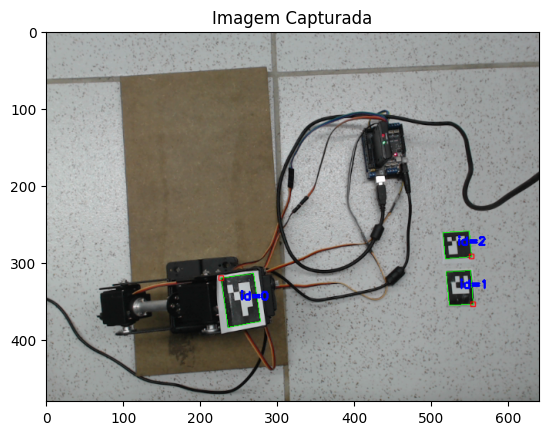

533 276


In [5]:
xt, yt, _, _, _ = camera.get_aruco_positions(2)
xt, yt, _, _, _ = camera.get_aruco_positions(2)
xt, yt, _, _, _ = camera.get_aruco_positions(2, plot_image=True)

print(xt, yt)

In [11]:
import torch
import time

In [15]:
robot.reset()

Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10


[[0]
 [1]]
Ponto inicial atualizado: 229, 164


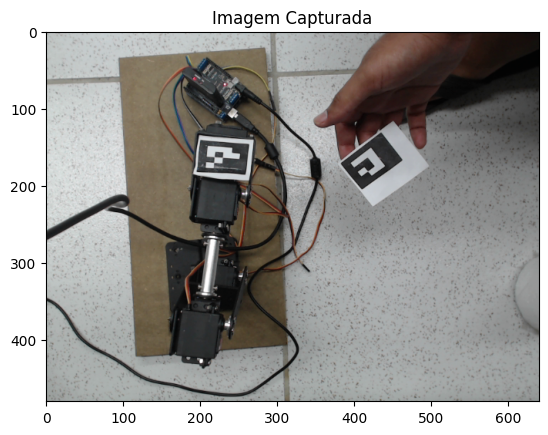

In [176]:
camera.set_origin()

In [7]:
from utils.functions import mapping
import numpy as np

In [8]:
from IPython.display import clear_output

In [55]:
np.concatenate([np.array([1,1,1,1]), [0,0]])

array([1, 1, 1, 1, 0, 0])

In [9]:
def img2real_test(imgpos, cameraHeight=0.48, focalLength=1500):
    real_pos_x = -(cameraHeight * imgpos[0]) / focalLength # ver a questão da orientação do braço robô
    real_pos_y = (cameraHeight * imgpos[1]) / focalLength
    return real_pos_x, real_pos_y

In [8]:
import numpy as np
yt_px, xt_px, yt, xt, _ = camera.get_aruco_positions(1, focalLength=450)
ya_px, xa_px, ya, xa, _ = camera.get_aruco_positions(2, focalLength=450)
print(yt_px, xt_px)
print(ya_px, xa_px)

print(np.linalg.norm(np.array([xt, yt]) - np.array([xa, ya])))

394 282
537 286
0.152592995324891


In [61]:
for fl in range(0,5000):
    result = img2real_test((yt_px,xt_px),fl)[0] - img2real_test((ya_px,xa_px),fl)[0]
    if(result<0.16 and result>0.14):
        print(fl, result)

1 0.15052631578947367


In [12]:
robot.reset()

Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10


In [47]:
img2real_test((yt,xt))

(-0.0535578947368421, -0.017684210526315792)

In [48]:
img2real_test((ya,xa))

(-0.12581052631578946, -0.017684210526315792)

In [11]:
camera.show_arucos()

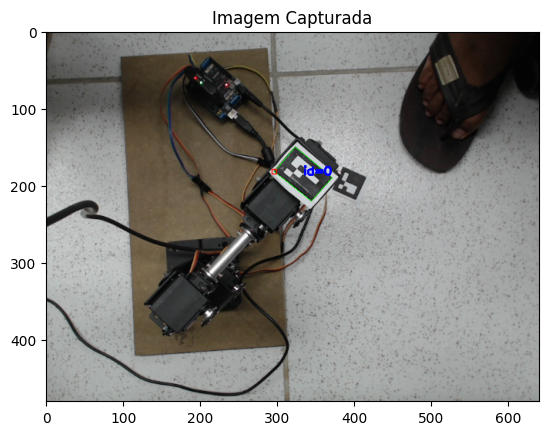

(81, -162, -0.08639999999999999, -0.17279999999999998, 75.4254598925323)

In [74]:
camera.get_aruco_positions(0, focalLength=450, plot_image=True)

In [301]:
robot.reset()

Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10


In [52]:
print(xt, yt)

-0.07573333333333333 -0.2997333333333333


In [ ]:
from math import cos, sin, atan

def target80(xs, ys, xt, yt):
    
    return xt, yt

In [ ]:
robot.sa

In [300]:
import math
xt = 0.1

yt = 0.1

_,_,xt,yt,_ = camera.get_aruco_positions(1, focalLength=450)


yt = -yt
xt = -xt + 0.035

_,_,yc,xc,_ = camera.get_aruco_positions(0, focalLength=450)
xc = xc + 0.035


pos_hist = torch.Tensor([[0,0,0,0],
                              [0,0,0,0],
                              [0,0,0,0],
                              [xc, yc, xt-xc, yt-yc]])

dist = dist_pos(pos_hist[-1], [xt,yt])
print(f'Target: ({xt}, {yt})')

#new_xt = xc - xt
#new_yt = yc - yt
#
#dis = 0.1
#
#theta_t = math.acos(new_xt/math.sqrt(new_xt**2 + new_yt**2))
#
#new_xt = xt - 0.24
#new_yt = yt - 0.06
#
#xt = new_xt
#yt = new_yt
#
#print(f"new target ({xt} {yt})")

robot.reset()
print(f'Posição atual: ({xc}, {yc})')
count = 0
a = True
while((dist>0.01)and(count<10000)):
    theta_pred = rnn_model(pos_hist.reshape(1,4,4)).reshape(4).detach().numpy()
    theta_pred = mapping(np.concatenate([theta_pred, [0,0]]))
    robot.move_to(theta_pred[0],theta_pred[1],theta_pred[2],theta_pred[3])
    time.sleep(3)
    camera.get_aruco_positions(0)
    camera.get_aruco_positions(0)
    _,_,yc,xc,_ = camera.get_aruco_positions(0, focalLength=450)
    xc = xc + 0.035
    dist = dist_pos([xc,yc], [xt,yt])
    pos_hist = torch.cat([pos_hist[1:], torch.Tensor([[xc,yc,xt-(xc),yt-yc]])])
    #clear_output(True)
    print(f'Posição atual: ({xc}, {yc})')
    print(pos_hist)
    count+=1

Target: (0.28779999999999994, 0.06826666666666667)
Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10
Posição atual: (0.18966666666666665, -0.019200000000000002)
Comando enviado: 0:105.80839911855385, 1:50.602041863853714, 2:106.11671810760888, 3:53.89455337417376
Posição atual: (0.14806666666666668, -0.2965333333333333)
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.1897, -0.0192,  0.0981,  0.0875],
        [ 0.1481, -0.2965,  0.1397,  0.3648]])
Comando enviado: 0:114.68712253009892, 1:46.146538713525146, 2:102.5366949447142, 3:54.60966948451904
Posição atual: (-0.02473333333333333, -0.19946666666666665)
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.1897, -0.0192,  0.0981,  0.0875],
        [ 0.1481, -0.2965,  0.1397,  0.3648],
        [-0.0247, -0.1995,  0.3125,  0.2677]])
Comando enviado: 0:116.60104398837404, 1:56.738925851975154, 2:111.79458606274878, 3:53.43638641908342


KeyboardInterrupt: 

In [28]:
pos_hist.shape

torch.Size([4, 3])

In [20]:
from utils.functions import ikine, mapping

robot.move_to( *mapping(ikine([0.1, 0.0, .12], .1, .124, .06))[:4])

Comando enviado: 0:80.0, 1:128.7311692405338, 2:168.1343989399437, 3:39.403229699409906


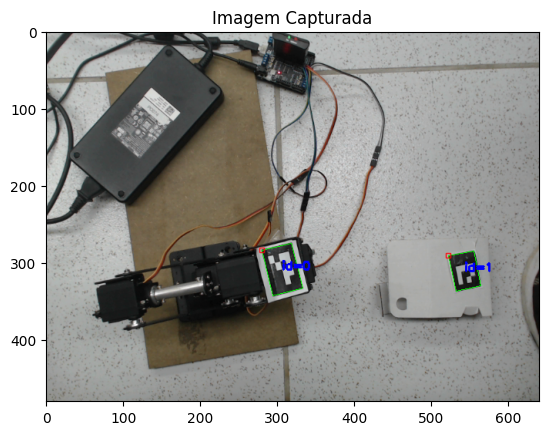

(306, 308, -0.09792, 0.09856000000000001, 72.18032973047436)

In [23]:
camera.get_aruco_positions(plot_image=True)

In [67]:
camera.release()
robot.close()